# Tutorial: Integrating GraphSpace into network analysis projects

## Introduction

- Required files for today
    - Clone or download this repository: [http://bit.ly/icsb2017](http://bit.ly/icsb2017)
    - IPython/Jupyter notebooks (*Add links*)
    - Datasets in the data subdirectory (*Add links*)
- Required software for today
    - Both Python 2 and 3 are welcome
    - [Jupyter](http://jupyter.readthedocs.io/en/latest/install.html) or [IPython](https://ipython.org/install.html) (and their dependencies)
    - [Anaconda distribution of Python](https://www.continuum.io/downloads) is an easy way to install these
- About Me
    - PhD Student, CS@VT
    - Website: [adityabharadwaj.in](adityabharadwaj.in)
    - Email: adb@vt.edu
    - Twitter: @adbcoder

    
## Agenda

1. Setup required softwares
1. Introduction to python programming
2. Creating and uploading graphs
    - Basics of NetworkX API
    - Visualizing networks on GraphSpace
    - Adding style to the networks
    - Specifying weights on edges
    - Laying out nodes programmatically
3. Managing groups
    - Create groups
    - Add/Remove group members
    - Share graphs with groups
4. Managing layouts
    - Sharing layouts
    - Set default layout
5. Publishing graphs
6. Searching graphs on GraphSpace
8. RESTful APIs
    - Exploring and finding the right API
    - Using RESTful APIs

# Part 1. Setup required softwares


## Install Jupyter/IPython notebook

> The Jupyter Notebook is an interactive computing environment that enables users to author notebook documents that include: - Live code - Interactive widgets - Plots - Narrative text - Equations - Images - Video.

### Install Jupyter 

Go to [Jupyter](http://jupyter.readthedocs.io/en/latest/install.html) and follow the instructions.

### Start Jupyter

1. Open command line and go the directory where you installed tutorial repository and start jupyter using the following command:
```
jupyter notebook
```
2. You should see the notebook open in your browser.

In [211]:
# for Python 2: use print only as a function
from __future__ import print_function

In [213]:
print("Hello world")

Hello world


## Install `graphspace-python` package

There are multiple ways to install `graphspace_python` package.

    
##### a. Use pip (recommended)
```
pip install graphspace_python
```
    
##### b. Install manually from PyPi package
```
https://pypi.python.org/pypi/graphspace_python
```

##### c. Install the latest development version from GitHub
```
git clone https://github.com/adbharadwaj/graphspace-python.git
```  

In [30]:
!pip install graphspace_python==0.7.2

    100% |████████████████████████████████| 829kB 967kB/s 
    100% |████████████████████████████████| 61kB 3.0MB/s 
    100% |████████████████████████████████| 122kB 3.2MB/s 
    100% |████████████████████████████████| 102kB 435kB/s 
  Running setup.py bdist_wheel for graphspace-python ... - \ | / - done
  Stored in directory: /home/adb/.cache/pip/wheels/4b/3c/18/e8da26b8a7d688cf1eed6916820e13b41cb20f710040d55a32
  Running setup.py bdist_wheel for future ... - \ | / - done
  Stored in directory: /home/adb/.cache/pip/wheels/c2/50/7c/0d83b4baac4f63ff7a765bd16390d2ab43c93587fac9d6017a
  Running setup.py bdist_wheel for commonmark ... - \ | done
  Stored in directory: /home/adb/.cache/pip/wheels/fd/3a/ea/9ead7944d8ba3771888487ca4f6ef39bcde9fd4e986c32f442
Successfully built graphspace-python future commonmark


# Part 2: Introduction to python programming

>  Python is an interpreted, general-purpose high-level programming language whose design philosophy emphasises code readability

## Lists

Lists are the most commonly used data structure. Think of it as a sequence of data that is enclosed in square brackets and data are separated by a comma. Each of these data can be accessed by calling it's index value.

In [20]:
l = []
# l = list()

In [21]:
l = ['apple', 'orange', 123] 

In [22]:
print(l)

['apple', 'orange', 123]


In python, Indexing starts from 0. Thus now the list `l`, which has three elements will have apple at 0 index, orange at 1 index and 123 at 2 index.

In [23]:
print(l[0], l[1])

apple orange


## Tuple

Tuples are similar to lists but only big difference is the elements inside a list can be changed but in tuple it cannot be changed.

In [24]:
tup = ()
#tup = tuple()

Values can be assigned while declaring a tuple. It takes a list as input and converts it into a tuple or it takes a string and converts it into a tuple.

In [25]:
tup3 = tuple([1,2,3])
print(tup3)
tup4 = tuple('Hello')
print(tup4)

(1, 2, 3)
('H', 'e', 'l', 'l', 'o')


## Dictionaries


Dictionaries are more used like a database because here you can index a particular sequence with your user defined string.

In [26]:
data = {}
# data = dict()

In [27]:
data['firstname'] = 'Aditya'
data['lastname'] = 'Bharadwaj'
data['age'] = 25

print(data)

{'lastname': 'Bharadwaj', 'firstname': 'Aditya', 'age': 25}


## Loops

```
for variable in something:
    algorithm
```

In [28]:
for i in [1,2,3,4,5]:
    print(i)

1
2
3
4
5


In [31]:
import graphspace_python as gp
from graphspace_python.graphs.classes.gsgraph import GSGraph
from graphspace_python.graphs.classes.gslayout import GSLayout
from graphspace_python.api.client import GraphSpace
from graphspace_python.graphs.classes.gsgroup import GSGroup

# Part 3: Creating and uploading graphs

## Basic concepts in NetworkX



> **NetworkX** is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Documentation is available at [https://networkx.readthedocs.io/en/stable/](https://networkx.readthedocs.io/en/stable/)


###### Create an empty graph

In [49]:
import networkx as nx
G = nx.DiGraph()

In [59]:
# Add a node

G.add_node('a')

In [60]:
# Add multiple nodes

G.add_nodes_from(['b', 'c', 'd'])

In [61]:
G.nodes()

['d', 'a', 'b', 'c']

In [62]:
# Remove node from the graph

G.remove_node('d')

In [63]:
G.nodes()

['a', 'b', 'c']

In [64]:
# Add edges to the graph

G.add_edge('a', 'b')
G.add_edges_from([('b','c'), ('c', 'a')])

In [65]:
G.edges()

[('a', 'b'), ('b', 'c'), ('c', 'a')]

In [66]:
# Remove edge from the graph

G.remove_edge('c', 'a')

In [67]:
G.edges()

[('a', 'b'), ('b', 'c')]

In [68]:
# Get Graph Info

print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667


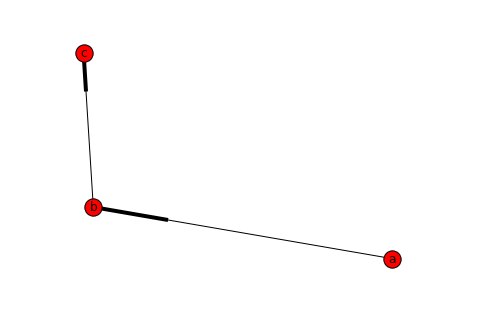

In [86]:
nx.draw(G, with_labels=True)

## Uploading your network to GraphSpace

First you need to connect to GraphSpace using your username and password.

In [92]:
graphspace = GraphSpace('user6@example.com', 'user6')

Once you are connected, you can use this connection to post/upload your graphs to GraphSpace.

In [93]:
graph = graphspace.post_graph(GSGraph(G))

In [94]:
graph.url

'http://graphspace.org/graphs/22566'

![network-without-label](images/network-without-label.png)

## Updating your network on GraphSpace

In [96]:
graph.set_name('My First Graph')
graph = graphspace.update_graph(graph, graph_id=graph.id)
graph.url

'http://graphspace.org/graphs/22566'

## Adding node labels

In [97]:
for n in graph.nodes():
    graph.node[n]['data']['label'] = graph.node[n]['data']['name']
    
graph = graphspace.update_graph(graph, graph_id=graph.id)
graph.url

'http://graphspace.org/graphs/22566'

![network-with-labels](images/network-with-labels.png)

## Adding visual styles to nodes

##### Allowed node shapes
- ellipse (default)
- rectangle
- roundrectangle 
- triangle
- pentagon
- hexagon
- heptagon
- octagon
- star
- diamond
- vee
- rhomboid

In [100]:
for n in graph.nodes():
    graph.add_node_style(n, shape='rectangle', color='green', width=100, height=100)
    
graph = graphspace.update_graph(graph, graph_id=graph.id)
graph.url

'http://graphspace.org/graphs/22566'

![](images/network-with-node-style.png)

## Adding visual style to edges


##### Allowed edge styles
- solid (default)
- dotted
- dashed

In [102]:
for u,v in graph.edges():
    graph.add_edge_style(u, v, directed=True, edge_style='dotted', width=10.0)
    
graph = graphspace.update_graph(graph, graph_id=graph.id)
graph.url

'http://graphspace.org/graphs/22566'

![](images/network-with-edge-style.png)

## Adding annotations to nodes and edges

##### 'popup' attribute

A string that will be displayed in a popup window when the user clicks the node/edge. This string can be HTML-formatted information, e.g., Gene Ontology annotations and database links for a protein; or types, mechanism, and database sources for an interaction.

In [104]:
graph.node['a']['data']['popup'] = 'Node A'
graph.node['b']['data']['popup'] = 'Node B'
graph.node['c']['data']['popup'] = 'Node C'

graph['a']['b']['data']['popup'] = 'Edge a-b'
graph['b']['c']['data']['popup'] = 'Edge b-c'

graph = graphspace.update_graph(graph, graph_id=graph.id)
graph.url

'http://graphspace.org/graphs/22566'

![](images/network-with-popups.png)

## Laying out nodes

Layouts provide a powerful means to position nodes within a network and manage visual styles for nodes and edges.

In [105]:
L = GSLayout()
# Assign different colors to nodes
L.add_node_style('a', shape='rectangle', color='blue', width=100, height=100)
L.add_node_style('b', shape='rectangle', color='green', width=100, height=100)
L.add_node_style('c', shape='rectangle', color='red', width=100, height=100)
L.add_edge_style('a', 'b', directed=True, edge_style='dotted', width=5.0)
L.add_edge_style('b', 'c', directed=True, edge_style='dashed', width=5.0)

# Position nodes in a vertical alignment.
L.set_node_position('a', y=0, x=0)
L.set_node_position('b', y=500, x=0)
L.set_node_position('c', y=1000, x=0)

L.set_name('My First Layout')

In [106]:
layout = graphspace.post_graph_layout(graph_id=graph.id, layout=L)

In [111]:
# Go to the following url o visualize the layout.
layout.url

'http://graphspace.org/graphs/22566?user_layout=1375'

![](images/network-with-vertical-layout.png)

In [113]:
layout.set_node_position('a', y=0, x=0)
layout.set_node_position('b', y=0, x=250)
layout.set_node_position('c', y=0, x=500)
layout = graphspace.update_graph_layout(graph_id=graph.id, name=layout.name, layout=layout)

In [112]:
# Go to the following url o visualize the layout.
layout.url

'http://graphspace.org/graphs/22566?user_layout=1375'

![](images/network-with-horizontal-layout.png)

## Specifying weights on edges

In [126]:
# G.add_edge('a', 'b', weight=5)
# G.add_edge('b', 'c', weight=10)
graph['a']['b']['data']['weight']  = 5
graph['b']['c']['data']['weight']  = 10
graph.edges(data=True)

[('a',
  'b',
  {'data': {'is_directed': False,
    'name': 'a-b',
    'popup': 'Edge a-b',
    'source': 'a',
    'target': 'b',
    'weight': 5},
   'is_directed': 1}),
 ('b',
  'c',
  {'data': {'is_directed': False,
    'name': 'b-c',
    'popup': 'Edge b-c',
    'source': 'b',
    'target': 'c',
    'weight': 10},
   'is_directed': 1})]

In [127]:
graph = graphspace.update_graph(graph, graph_id=graph.id)
graph.url

'http://graphspace.org/graphs/22566'

#####  Note: If you add weights as a edge property, it will not reflect on graph visualization automatically.

![](images/network-with-horizontal-layout.png)

In [128]:
# Laying out edges with width propotional to edge weight.

layout.add_edge_style('a', 'b', directed=True, edge_style='dotted', width=graph['a']['b']['data']['weight'])
layout.add_edge_style('b', 'c', directed=True, edge_style='dashed', width=graph['b']['c']['data']['weight'])

In [130]:
layout = graphspace.update_graph_layout(graph_id=graph.id, name=layout.name, layout=layout)
layout.url

'http://graphspace.org/graphs/22566?user_layout=1375'

![](images/network-with-varying-edge-width.png)

# Part 4: Managing collaborative groups and sharing graphs

A **group** is a collection of GraphSpace users. For example, if there are multiple researchers who are collaborating a project, a group may be created containing all of them. 

A **group owner** is the creator of the group. Any GraphSpace user can create a group by visiting the Groups page and clicking the “Create group” button. The group owner may

- Invite any GraphSpace user that has an account to be a member of their group.
- Remove any member from the group.
- Unshare any graph that has already been shared by the members of the group

A **group member** is a user who is a part of a group. (A group owner is trivially a member of the group.) A group member may

- Share a graph owned by him or her with a group.
- Unshare a previously shared graph.
- Share a layout for a previously shared graph.
- Unshare a previously shared layout.

## Creating groups

In [132]:
group = graphspace.post_group(GSGroup(name='My first group', description='sample group'))

In [134]:
print(group.url)

http://graphspace.org/groups/263


## Adding and removing group members

In [136]:
# Initially a group is created with the group owner as a member.

for member in graphspace.get_group_members(name='My first group'):
    print(member.email)

user6@example.com


In [147]:
# Group owner can add existing users by their GraphSpace usernames

for email in ['adb@vt.edu', 'adb@cs.vt.edu']:
    graphspace.add_group_member(member_email=email, name='My first group')

In [153]:
# Getting the list of all group members

for member in graphspace.get_group_members(name='My first group'):
    print(member.email)

user6@example.com
adb@vt.edu


In [150]:
# Send the following invitation link to your collaborators (with/without GraphSpace accounts)

print("http://graphspace.org/groups/%s/join/?code=%s" % (group.id, group.invite_code))

http://graphspace.org/groups/263/join/?code=GJ7ETMMA5J


In [151]:

graphspace.delete_group_member(member_id=70, name='My first group')

'Successfully deleted member with id=70 from group with id=263'

In [154]:
for member in graphspace.get_group_members(name='My first group'):
    print(member.email)

user6@example.com
adb@vt.edu


## Sharing graphs with the groups

A user can share one or more graphs with groups to which the user belongs.

In [163]:
graphspace.add_group_graph(graph_id=graph.id, group_id=group.id)

{'created_at': '2017-08-04T15:02:55.458363',
 'graph_id': 22566,
 'group_id': '263',
 'updated_at': '2017-08-04T15:02:55.458363'}

In [164]:
for shared_graph in graphspace.get_group_graphs(name='My first group'):
    print(shared_graph.owner_email, shared_graph.name)

user6@example.com My First Graph


## Unsharing graphs 

In [159]:
graphspace.delete_group_graph(graph_id=graph.id, group_id=group.id)

'Successfully deleted graph with id=22566 from group with id=263'

In [161]:
# No graph is shared with the group at this point.

for shared_graph in graphspace.get_group_graphs(name='My first group'):
    print(shared_graph.owner_email, shared_graph.name)

# Part 5: Managing layouts

## Set the layout as default

# Pending

## Sharing layouts

In [168]:
for mylayout in graphspace.get_my_graph_layouts(graph_id=graph.id):
    print(mylayout.name, mylayout.id)

My First Layout 1375


Similarily you can also get the list of shared layouts using `get_shared_graph_layouts` method.

In [169]:
layout = graphspace.get_graph_layout(graph_id=graph.id, name='My First Layout')

In [170]:
print(layout.url)

http://graphspace.org/graphs/22566?user_layout=1375


In [174]:
layout.set_is_shared(1)
layout = graphspace.update_graph_layout(graph_id=graph.id, name=layout.name, layout=layout)

# Part 6: Publishing graphs

In [181]:
# Sharing the graph with everyone. This graph will show up in Public Graphs list.

graphspace.make_graph_public(graph_id=graph.id)

In [182]:
print(graph.url)

http://graphspace.org/graphs/22566


In [183]:
# Unpublishing graphs

graphspace.make_graph_private(graph_id=graph.id)

In [184]:
print(graph.url)

http://graphspace.org/graphs/22566


# Part 7: Searching graphs on GraphSpace

You can search for graphs based on their visibility.
- Graphs posted by you
- Graphs shared with one of your groups
- Graphs shared with everyone

In [186]:
# Getting a list of public graphs with 'pathlinker' as a subtring in atleast one of their tags.

for g in graphspace.get_public_graphs(tags=['%pathlinker%'],limit=100, offset=0):
    print(g.owner_email, g.name)

annaritz@vt.edu Wnt-Pathway-Reconstruction
annaritz@vt.edu Wnt-pathlinker-top200paths-labeled
annaritz@vt.edu Wnt-ipa-nmax10-labeled
annaritz@vt.edu NetPath-Wnt-pathlinker-top200paths
annaritz@vt.edu NetPath-TNFalpha-pathlinker-top200paths
annaritz@vt.edu NetPath-TGF_beta_Receptor-pathlinker-top200paths
annaritz@vt.edu NetPath-TCR-pathlinker-top200paths
annaritz@vt.edu NetPath-RANKL-pathlinker-top200paths
annaritz@vt.edu NetPath-Prolactin-pathlinker-top200paths
annaritz@vt.edu NetPath-Leptin-pathlinker-top200paths
annaritz@vt.edu NetPath-KitReceptor-pathlinker-top200paths
annaritz@vt.edu NetPath-IL-7-pathlinker-top200paths
annaritz@vt.edu NetPath-IL6-pathlinker-top200paths
rishu.sethi2525@gmail.com NetPath-IL3-pathlinker-top200paths
annaritz@vt.edu NetPath-IL3-pathlinker-top200paths
annaritz@vt.edu NetPath-IL2-pathlinker-top200paths
annaritz@vt.edu NetPath-IL1-pathlinker-top200paths
annaritz@vt.edu NetPath-EGFR1-pathlinker-top200paths
annaritz@vt.edu NetPath-BDNF-pathlinker-top200paths

In [188]:
# Getting a list of my graphs.

for g in graphspace.get_my_graphs(limit=100, offset=0):
    print(g.owner_email, g.name)

user6@example.com My First Graph


# Part 8: RESTful APIs

The GraphSpace REST API provides endpoints for entities such as graphs, layouts, and groups that allow developers to interact with the GraphSpace website remotely by sending and receiving JSON objects. This API enables developers to create, read, and update GraphSpace content from client-side JavaScript or from applications written in any language.

## Finding the right API for you

[API Reference](http://manual.graphspace.org/en/latest/Programmers_Guide.html#api-reference)

## Testing GraphSpace APIs

**Postman** is a Google Chrome app for interacting with HTTP APIs. It provides a friendly GUI for constructing requests and reading responses. Postman makes it easy to test, develop and document APIs by allowing users to quickly put together both simple and complex HTTP requests.

##### Postman Installation

Postman is available as a native app (recommended) for Mac / Windows / Linux, and as a Chrome App. The Postman Chrome app can only run on the Chrome browser. To use the Postman Chrome app, you need to:

1. Install Google Chrome: Install Chrome.
2. If you already have Chrome installed, head over to Postman’s page on the Chrome Webstore – https://chrome.google.com/webstore/detail/postman-rest-client-packa/fhbjgbiflinjbdggehcddcbncdddomop?hl=en, and click ‘Add to Chrome’.
3. After the download is complete, launch the app.

[Download Postman Collection](https://gist.github.com/sandeepm96/a824a6d0e643811389a6bf212e30a381)


##### Importing the postman collection:

- Click Import button in the top menu.

![](images/postman-collection-import.jpg)

- Choose the Import File in the pop up window.

- Provide the Authorization details for the imported requests (as Authorization details have been removed for security concern)

